# Exploratory Data Analysis (EDA)
## S&P 500 Historical Data Project

This notebook explores historical S&P 500 price data from Investing.com.

We will:

1. Inspect the raw dataset.
2. Create a “dirty” version to simulate real-world data issues.
3. Explore missing values, duplicates, outliers.
4. Visualize trends and distributions.
5. Prepare for the cleaning pipeline.

## 1. Dataset Description

The dataset contains historical S&P 500 price data downloaded from Investing.com.

- Original file: `sp500_raw.csv`
- Location: `data/raw/`
- Columns:
  - Date
  - Price
  - Open
  - High
  - Low
  - Vol. (we will drop this column)
  - Change %
- Rows: 5001

In [4]:
import pandas as pd

df = pd.read_csv("../data/raw/sp500_raw.csv")

if 'Vol.' in df.columns:
    df = df.drop(columns=['Vol.'])

df.head()

,Date,Price,Open,High,Low,Change %
0,10/29/2009,"1,066.10","1,043.70","1,066.80","1,043.70",2.25%
1,10/28/2009,"1,042.60","1,061.50","1,063.30","1,042.20",-1.96%
2,10/27/2009,"1,063.40","1,067.50","1,072.50","1,060.60",-0.34%
3,10/26/2009,"1,067.00","1,080.40","1,091.80","1,065.20",-1.17%
4,10/23/2009,"1,079.60","1,095.60","1,095.80","1,075.50",-1.22%


## 2. Dataset Info

Check basic info: shape, data types, missing values, duplicates


In [15]:
df.info()

df.isna().sum()

df.duplicated().sum()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   str    
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Change %  5000 non-null   float64
dtypes: float64(5), str(1)
memory usage: 234.5 KB


np.int64(0)

### 2.1. Convert Columns to Numeric
The numeric columns (Price, Open, High, Low) are read as strings because they contain commas.
We also convert 'Change %' to float by removing the percent sign.

In [ ]:
# Remove commas and convert to float
num_cols = ['Price', 'Open', 'High', 'Low']
for col in num_cols:
    df[col] = df[col].str.replace(',', '').astype(float)

# Convert Change % to float
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

df.dtypes
df.head()

,Date,Price,Open,High,Low,Change %
0,10/29/2009,1066.1,1043.7,1066.8,1043.7,2.25
1,10/28/2009,1042.6,1061.5,1063.3,1042.2,-1.96
2,10/27/2009,1063.4,1067.5,1072.5,1060.6,-0.34
3,10/26/2009,1067.0,1080.4,1091.8,1065.2,-1.17
4,10/23/2009,1079.6,1095.6,1095.8,1075.5,-1.22


## 3. Simulate a Dirty Dataset
To demonstrate a cleaning pipeline, we create a dirty dataset with:
- Duplicate rows
- Missing values
- Outliers
- Shuffled rows
- Column name inconsistencies


In [13]:
import numpy as np

# Create dirty dataset
df_dirty = df.copy()

# 1. Duplicate 20 random rows
duplicates = df_dirty.sample(20, random_state=42)
df_dirty = pd.concat([df_dirty, duplicates], ignore_index=True)

# 2. Introduce NaN in Price (30 rows)
nan_indices = np.random.choice(df_dirty.index, 30, replace=False)
df_dirty.loc[nan_indices, 'Price'] = np.nan

# 3. Introduce outliers in High (multiply by 5)
outlier_indices = np.random.choice(df_dirty.index, 5, replace=False)
df_dirty.loc[outlier_indices, 'High'] *= 5

# 4. Shuffle rows
df_dirty = df_dirty.sample(frac=1, random_state=1).reset_index(drop=True)

# 5. Add extra spaces in column names
df_dirty.columns = [col + " " for col in df_dirty.columns]

# Save dirty dataset
df_dirty.to_csv("../data/raw/sp500_dirty.csv", index=False)

# Preview
df_dirty.head()

,Date,Price,Open,High,Low,Change %
0,05/25/1993,448.9,448.0,449.0,447.7,0.20
1,08/12/1991,388.0,387.1,388.2,385.9,0.23
2,07/25/2000,1474.5,1464.3,1476.3,1464.3,0.70
3,05/02/2006,1313.2,1305.2,1313.7,1305.2,0.61
4,01/12/1993,431.0,430.9,431.4,428.2,0.02


## 4. Inspection of the Dirty Dataset

    

In [14]:
df_dirty = pd.read_csv("../data/raw/sp500_dirty.csv")

df_dirty.info()

df_dirty.isna().sum()

df_dirty.duplicated().sum()

<class 'pandas.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5020 non-null   str    
 1   Price      4990 non-null   float64
 2   Open       5020 non-null   float64
 3   High       5020 non-null   float64
 4   Low        5020 non-null   float64
 5   Change %   5020 non-null   float64
dtypes: float64(5), str(1)
memory usage: 235.4 KB


np.int64(20)

## 5. Descriptive Statistics
Explore basic statistics to detect anomalies/outliers

In [16]:
df_dirty.describe()

,Price,Open,High,Low,Change %
count,4990.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,918.602084,918.833546,929.050458,912.192151,0.029169
std,378.885434,378.792990,408.406562,375.789560,1.177228
min,295.500000,295.500000,301.400000,294.500000,-9.040000
25%,471.275000,471.425000,473.400000,469.825000,-0.490000
50%,983.650000,984.250000,993.450000,974.050000,0.050000
75%,1244.950000,1245.000000,1254.050000,1234.425000,0.570000
max,1565.200000,1565.000000,7038.500000,1555.500000,11.590000


## 6. Visualize price trends and distributions

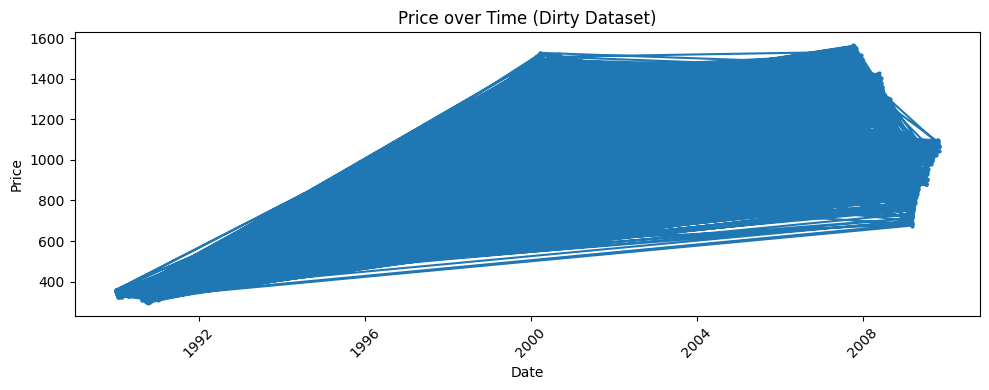

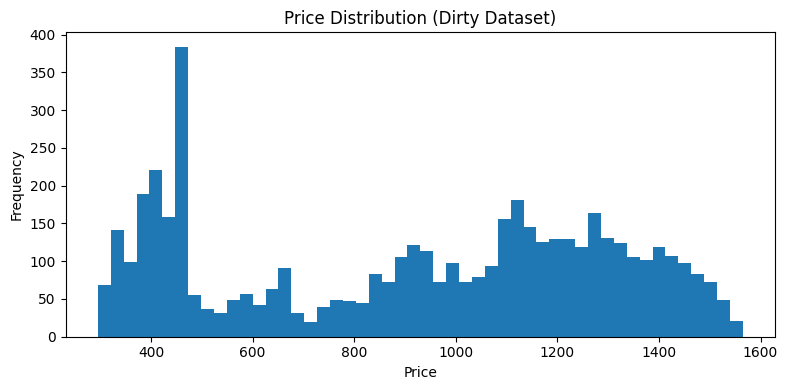

In [ ]:
import matplotlib.pyplot as plt

# Price over time
plt.figure(figsize=(10,4))
plt.plot(pd.to_datetime(df_dirty['Date ']), df_dirty['Price '], marker='o', markersize=2)
plt.title("Price over Time (Dirty Dataset)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(8,4))
plt.hist(df_dirty['Price '].dropna(), bins=50)
plt.title("Price Distribution (Dirty Dataset)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## 7. Observations
- Missing values exist in Price (30 introduced)
- Duplicate rows exist (20 introduced)
- Outliers in High column
- Rows are shuffled
- Column names have extra spaces
- Dataset is ready for cleaning pipeline